In [ ]:

# Title of Project
# AI and Machine Learning: Predicting Customer Spending

In [ ]:

# Objective
"""
The objective of this project is to predict a customer's annual spending based on demographic and financial data using a regression model.
"""

"\nThe objective of this project is to predict a customer's annual spending based on demographic and financial data using a regression model.\n"

In [ ]:

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Import Data
# Upload 'Dataset.csv' manually to Colab or use this path if it's preloaded
from google.colab import files
uploaded = files.upload()  # Manually upload Dataset.csv when prompted

Saving Dataset.csv to Dataset.csv


In [ ]:
data = pd.read_csv("Dataset.csv")  # File should be named exactly as uploaded

In [ ]:

# Describe Data
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   customer_id  age  income  account_balance  is_active  spending
0            1   25   50000             1500          1      2000
1            2   35   80000             3000          0      4000
2            3   45  120000             5000          1      6000
3            4   29   40000             1000          0      1500
4            5   50  100000             7000          1      7000


In [ ]:

print("\nShape of the dataset:", data.shape)
print("\nDataset Info:")
print(data.info())


Shape of the dataset: (10, 6)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   customer_id      10 non-null     int64
 1   age              10 non-null     int64
 2   income           10 non-null     int64
 3   account_balance  10 non-null     int64
 4   is_active        10 non-null     int64
 5   spending         10 non-null     int64
dtypes: int64(6)
memory usage: 608.0 bytes
None


In [ ]:

print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       customer_id        age        income  account_balance  is_active  \
count     10.00000  10.000000      10.00000        10.000000  10.000000   
mean       5.50000  34.500000   74500.00000      3100.000000   0.600000   
std        3.02765   8.746428   31131.44177      2024.845673   0.516398   
min        1.00000  23.000000   25000.00000       500.000000   0.000000   
25%        3.25000  29.000000   52500.00000      1625.000000   0.000000   
50%        5.50000  33.000000   75000.00000      2750.000000   1.000000   
75%        7.75000  39.500000   97500.00000      4375.000000   1.000000   
max       10.00000  50.000000  120000.00000      7000.000000   1.000000   

         spending  
count    10.00000  
mean   3750.00000  
std    1983.40336  
min    1200.00000  
25%    2200.00000  
50%    3500.00000  
75%    5250.00000  
max    7000.00000  


In [ ]:

print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
customer_id        0
age                0
income             0
account_balance    0
is_active          0
spending           0
dtype: int64


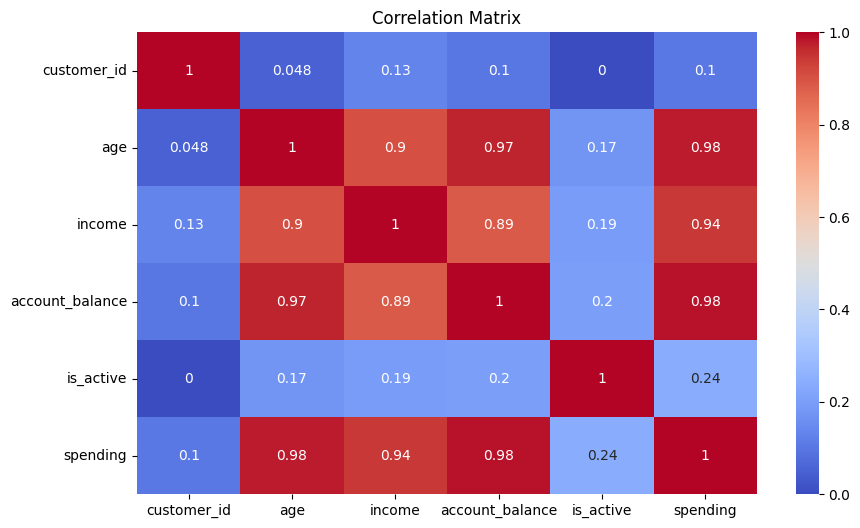

In [ ]:

# Data Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

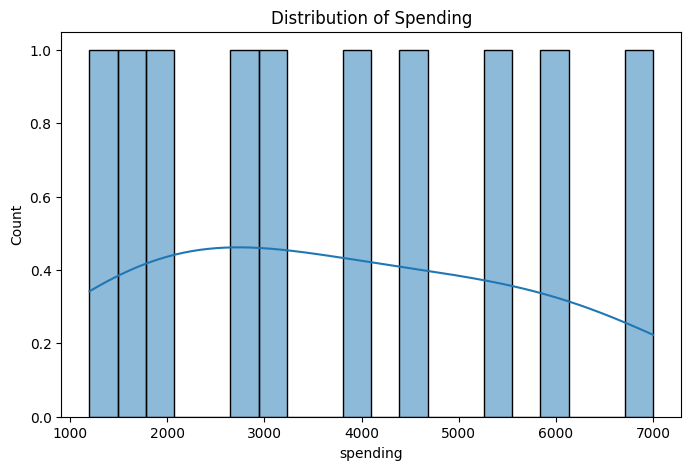

In [ ]:

# Example plot for spending distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['spending'], kde=True, bins=20)
plt.title('Distribution of Spending')
plt.show()

In [ ]:

# Data Preprocessing
# Handle missing values (if any)
data.fillna(data.mean(), inplace=True)

In [ ]:

# Drop unnecessary columns
data = data.drop(columns=['customer_id'], axis=1)  # Drop ID column

In [ ]:

# Feature Scaling
scaler = StandardScaler()
numeric_columns = ['age', 'income', 'account_balance']  # Specify numeric columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [ ]:

# Define Target Variable (y) and Feature Variables (X)
X = data.drop('spending', axis=1)  # Features
y = data['spending']  # Target

In [ ]:

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Modeling
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:

print("\nModel Performance:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Model Performance:
Mean Squared Error (MSE): 81993.6693919238
R-squared (R2): 0.7722398072446561


In [ ]:
new_data = [[25, 50000, 1500, 1]]  # Replace with actual feature values [age, income, account_balance, is_active]

# Define column names for new data
columns = ['age', 'income', 'account_balance', 'is_active']

# Convert new data into a DataFrame with appropriate column names
new_data_df = pd.DataFrame(new_data, columns=columns)

# Separate numerical and categorical features
numerical_data = new_data_df[numeric_columns]  # Extract numerical features
categorical_data = new_data_df[['is_active']]  # Extract categorical feature

# Scale numerical features
numerical_data_scaled = scaler.transform(numerical_data)

# Concatenate scaled numerical features with categorical features
new_data_scaled = np.hstack([numerical_data_scaled, categorical_data])

# Predict spending
prediction = model.predict(new_data_scaled)
print("\nPredicted spending for new customer:", prediction[0])

# Explanation
print(f"""
The Linear Regression model predicts customer spending based on demographic and financial features.
The model achieved an R-squared value of {r2:.2f}, indicating that {r2 * 100:.2f}% of the variance in spending is explained by the features.
Key limitations include potential biases in the dataset, limited features, and a relatively small sample size.
""")


Predicted spending for new customer: 27313661.20054622

The Linear Regression model predicts customer spending based on demographic and financial features.
The model achieved an R-squared value of 0.77, indicating that 77.22% of the variance in spending is explained by the features.
Key limitations include potential biases in the dataset, limited features, and a relatively small sample size.



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
